<a href="https://colab.research.google.com/github/Kadiyan-harsh/Plant-Disease-Detection-System/blob/main/Train_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Jun  3 19:23:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# from google.colab import files
# files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshkadiyan","key":"1e1353a002ec14918b2690fe17eecd90"}'}

In [ ]:
# !ls -lha kaggle.json
# !pip install -q kaggle # installing the kaggle package
# !mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
# !cp kaggle.json ~/.kaggle/ # move the key to the folder
# !pwd # checking the present working directory

-rw-r--r-- 1 root root 68 Jun  3 19:51 kaggle.json
/content


In [ ]:
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
amanbarthwal/steam-store-data                                   Steam Store Data                                     6MB  2024-05-25 06:23:06            961         29  1.0              
kanchana1990/vehicle-dataset-2024                               Vehicle Dataset 2024                               308KB  2024-05-29 20:02:30           1054         34  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data      7KB  2024-05-25 23:55:26           1974         36  1.0              
rohit265/credit-card-eligibility-data-determining-factors       C

In [ ]:
# !kaggle datasets download -d vipoooool/new-plant-diseases-dataset -p /content/drive/MyDrive/Plant_Disease
# !kaggle datasets download -d thedevastator/hubmap-2022-512x512 -p </content/drive/MyDrive/Task2_hubmap

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 99% 2.68G/2.70G [00:26<00:00, 168MB/s]
100% 2.70G/2.70G [00:26<00:00, 108MB/s]


In [ ]:
# !unzip /content/drive/MyDrive/Plant_Disease/new-plant-diseases-dataset.zip -d /content/drive/MyDrive/Plant_Disease/new-plant-diseases-dataset/

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Plant_Disease/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: /content/drive/MyDrive/Plant_Disease/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: /content/drive/MyDrive/Plant_Disease/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: /content/drive/MyDrive/Plant_Disease/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2a

In [ ]:
# !cd /content/drive
# ! ls

In [ ]:
import tensorflow as tf
from tensorflow import keras
# from keras import layers, models, optimizers, losses, metrics
# from keras.models import Sequential
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Data preprocessing

In [ ]:
import keras
print(keras.__version__)
training_set= tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/plant_disease/train', #directory
    labels="inferred",
    label_mode="categorical", #padhna from keras site
    class_names=None,
    color_mode="rgb",
    batch_size=32, #fast karne ke liye increase batch size
    image_size=(128, 128),
    shuffle=True, #reduce the biasness of the model, randomly select kr rahe hai
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    # pad_to_aspect_ratio=False,
    # data_format=None,
    # verbose=True,
)

2.15.0
Found 70295 files belonging to 38 classes.


In [ ]:
#validation image preprocessing
validation_set= tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/plant_disease/valid', #directory
    labels="inferred",
    label_mode="categorical", #padhna from keras site
    class_names=None,
    color_mode="rgb",
    batch_size=32, #fast karne ke liye increase batch size
    image_size=(128, 128),
    shuffle=True, #reduce the biasness of the model, randomly select kr rahe hai
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    # pad_to_aspect_ratio=False,
    # data_format=None, #remove this
    # verbose=True,
)

Found 17572 files belonging to 38 classes.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[184.5  171.5  162.5 ]
   [190.   177.   168.  ]
   [190.   177.   168.  ]
   ...
   [175.75 158.75 151.75]
   [172.5  155.5  148.5 ]
   [177.25 160.25 153.25]]

  [[180.75 167.75 158.75]
   [190.   177.   168.  ]
   [192.25 179.25 170.25]
   ...
   [173.25 156.25 149.25]
   [177.5  160.5  153.5 ]
   [187.   170.   163.  ]]

  [[190.   177.   168.  ]
   [183.5  170.5  161.5 ]
   [193.75 180.75 171.75]
   ...
   [170.25 153.25 146.25]
   [171.   154.   147.  ]
   [180.25 163.25 156.25]]

  ...

  [[155.25 136.25 121.25]
   [148.   129.   114.  ]
   [162.5  143.5  128.5 ]
   ...
   [123.75 103.75  92.75]
   [150.5  130.5  119.5 ]
   [131.75 111.75 100.75]]

  [[157.5  138.5  123.5 ]
   [109.25  90.25  75.25]
   [137.5  118.5  103.5 ]
   ...
   [142.   122.   111.  ]
   [145.25 125.25 114.25]
   [140.25 120.25 109.25]]

  [[164.25 145.25 130.25]
   [156.25 137.25 122.25]
   [144.   125.   110.  ]
   ...
   [150.   130.   119.  ]
   [142.25 122.25 111.25]
   [141.25 121.25 11

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
##building cnn
## convolution layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu')) #remove padding in this-padhna - to increase speed and less parameters
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
##building cnn
## convolution layer
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [ ]:
##building cnn
## convolution layer
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
##building cnn
## convolution layer
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [ ]:
##building cnn
## convolution layer
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.25)) #overfitting avoid-25% neurons

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1500,activation='relu')) #isse phele units 1024 thi

In [ ]:
model.add(Dense(units=38,activation='softmax')) #max probability ke liye softmax

In [ ]:
model.add(Dropout(0.4))

In [ ]:
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#to avoid overshooting we using learning rate of 0.0001
#to avoid underfitting increase neuron
#add more convolution layer to extract more feature for unnderfitting

model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001,),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                   

In [ ]:
#trainging model

training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 140s 59ms/step - loss: 1.0958 - accuracy: 0.6763 - val_loss: 0.4670 - val_accuracy: 0.8496
Epoch 2/10
2197/2197 [==============================] - 125s 57ms/step - loss: 0.3740 - accuracy: 0.8783 - val_loss: 0.3541 - val_accuracy: 0.8866
Epoch 3/10
2197/2197 [==============================] - 126s 57ms/step - loss: 0.2437 - accuracy: 0.9186 - val_loss: 0.3459 - val_accuracy: 0.8905
Epoch 4/10
2197/2197 [==============================] - 123s 56ms/step - loss: 0.1999 - accuracy: 0.9333 - val_loss: 0.2782 - val_accuracy: 0.9170
Epoch 5/10
2197/2197 [==============================] - 125s 57ms/step - loss: 0.1572 - accuracy: 0.9478 - val_loss: 0.2854 - val_accuracy: 0.9165
Epoch 6/10
2197/2197 [==============================] - 133s 60ms/step - loss: 0.1473 - accuracy: 0.9518 - val_loss: 0.2821 - val_accuracy: 0.9224
Epoch 7/10
2197/2197 [==============================] - 125s 57ms/step - loss: 0.1290 - accuracy: 0.9576 - val_loss: 0

In [ ]:
#model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 62s 28ms/step - loss: 0.0671 - accuracy: 0.9786


In [ ]:
print(train_loss,train_acc)


0.0671071708202362 0.9786471128463745


In [ ]:
#model on validation set
val_loss,val_acc = model.evaluate(training_set)

2197/2197 [==============================] - 60s 27ms/step - loss: 0.0671 - accuracy: 0.9786


In [ ]:
print(val_loss,val_acc)

0.06710708886384964 0.9786471128463745


In [ ]:
#saving model
model.save("trained_model.keras")

In [ ]:
training_history.history

{'loss': [1.0957884788513184,
  0.373984694480896,
  0.24370446801185608,
  0.19994878768920898,
  0.15724799036979675,
  0.14729781448841095,
  0.12898829579353333,
  0.13493019342422485,
  0.122259721159935,
  0.110261932015419],
 'accuracy': [0.6763212084770203,
  0.8783270716667175,
  0.918614387512207,
  0.9332526922225952,
  0.9478057026863098,
  0.9518030881881714,
  0.9576498866081238,
  0.9564122557640076,
  0.9607084393501282,
  0.9641510844230652],
 'val_loss': [0.4670003354549408,
  0.3540884852409363,
  0.3458801507949829,
  0.27817341685295105,
  0.28540173172950745,
  0.2820827066898346,
  0.2938365042209625,
  0.36815348267555237,
  0.2961428165435791,
  0.30780020356178284],
 'val_accuracy': [0.8496471643447876,
  0.8865809440612793,
  0.8904507160186768,
  0.9170271158218384,
  0.916458010673523,
  0.9223765134811401,
  0.9174823760986328,
  0.901035726070404,
  0.9233439564704895,
  0.9248805046081543]}

In [ ]:
#recording history
import json
with open("training_hist.json") as f:
    json.dump(training_history.history,f)

<function matplotlib.pyplot.show(close=None, block=None)>

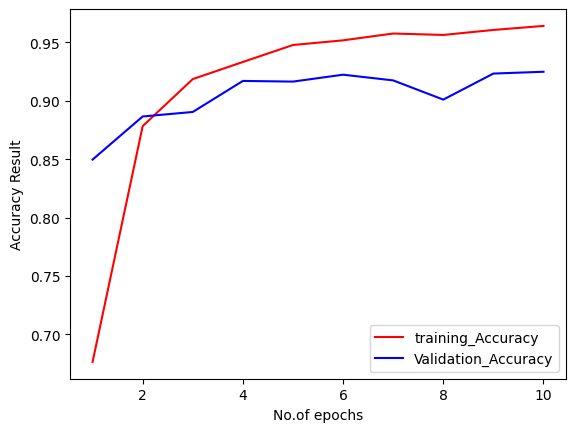

In [ ]:
#Accuracy visualization
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='training_Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation_Accuracy')
plt.xlabel("No.of epochs")
plt.ylabel("Accuracy Result")
plt.legend()
plt.show



In [ ]:
#other metric for model evalution
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
 #validation image preprocessing
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/plant_disease/valid', #directory
    labels="inferred",
    label_mode="categorical", #padhna from keras site
    class_names=None,
    color_mode="rgb",
    batch_size=32, #fast karne ke liye increase batch size
    image_size=(128, 128),
    shuffle=False,#phele true tha yeh  #reduce the biasness of the model, randomly select kr rahe hai
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    # pad_to_aspect_ratio=False,
    # data_format=None, #remove this
    # verbose=True,
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape
#shape is the probability of 38 class and each image
#choose max probab


550/550 [==============================] - 18s 31ms/step


(array([[9.9999726e-01, 8.5306701e-12, 1.6788503e-23, ..., 1.8400165e-19,
         1.8114492e-18, 3.9685366e-20],
        [9.9999189e-01, 1.5308693e-12, 3.6649201e-19, ..., 1.8678312e-23,
         8.3232299e-19, 6.4953923e-23],
        [9.9999869e-01, 2.3761536e-11, 2.9615422e-17, ..., 8.0169838e-27,
         5.3286784e-20, 3.1901306e-18],
        ...,
        [6.2845444e-11, 3.7539768e-18, 7.7407150e-11, ..., 2.4475311e-10,
         2.5956359e-18, 9.9718338e-01],
        [1.9792790e-13, 6.2683173e-27, 2.9975014e-21, ..., 6.1208371e-15,
         2.9479293e-25, 1.0000000e+00],
        [7.7267477e-17, 1.2075570e-21, 4.1638647e-25, ..., 7.0278874e-15,
         9.5059067e-18, 9.9999988e-01]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_catagories = tf.concat([y for x,y in test_set],axis=0)
true_catagories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_catagories,axis=1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.86      0.96      0.91       504
                                 Apple___Black_rot       0.98      0.97      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.80      0.88       440
                                   Apple___healthy       0.96      0.87      0.91       502
                               Blueberry___healthy       0.91      0.96      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.95      0.97       421
                 Cherry_(including_sour)___healthy       0.95      0.95      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.81      0.88       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.86      0.97      0.

In [ ]:
#confusion matrix
cn = confusion_matrix(Y_true,predicted_catagories)
cn.shape

(38, 38)

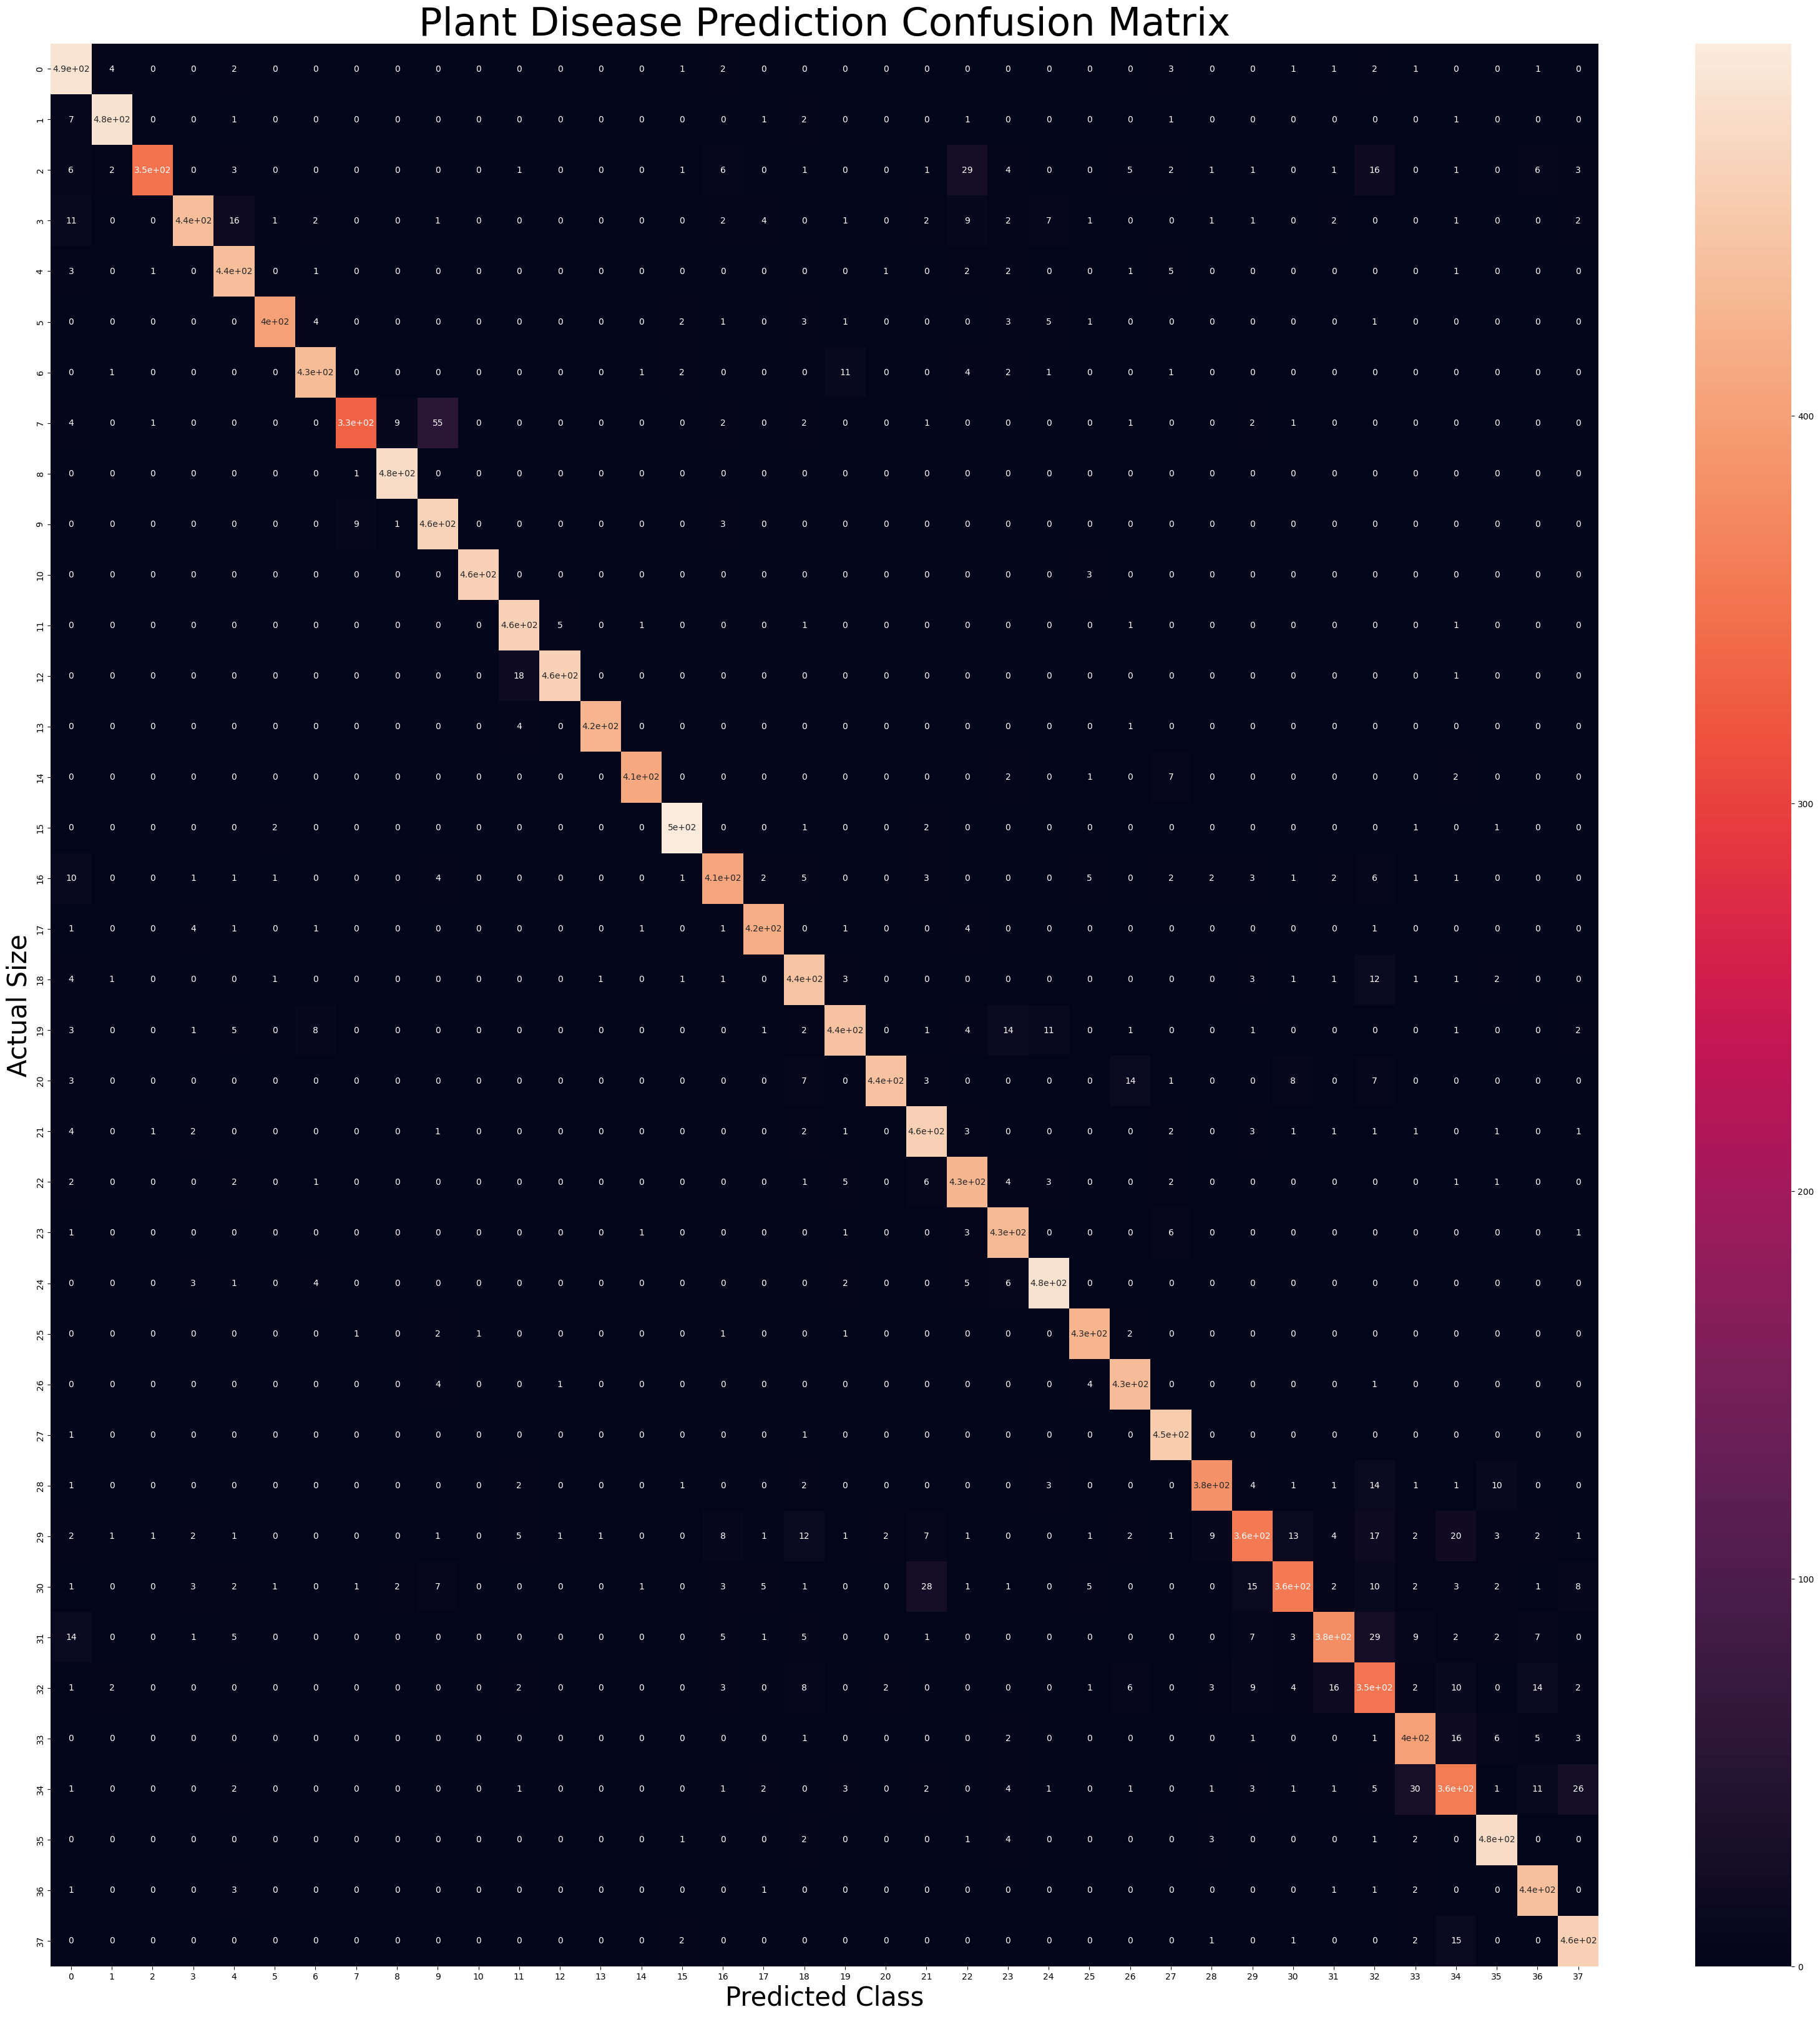

In [ ]:
#confusin matrix visualization
plt.figure(figsize=[40,40])
sns.heatmap(cn,annot=True) #padhna
plt.xlabel("Predicted Class",fontsize=30)
plt.ylabel("Actual Size",fontsize=30)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=45)
plt.show()